# Iris classification



## Step1- Importing required libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step2- Retrieve the  data

In [2]:
iris = pd.read_csv('IRIS.csv')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step3-Analyse the data

**Check if there is no missing data in Iris dataset.**

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Check that the classes are well balanced.**
You can use coutplot from sns.

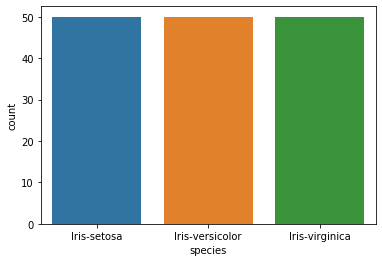

In [5]:
sns.countplot(x='species',data=iris)

## Step4- Preparing the data into train and test

**Put the dataset features in X and labels in y.**

In [6]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['species']

**Split the data into training set and testing set using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)**

Let's assume we decided to split the dataset into 60% train data and 40% test data.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Step5 and 6-**Import Decision Tree from scikit learn.**

**Import decision tree from scikit learn.**

In [10]:
from sklearn.tree import DecisionTreeClassifier

**Create a decision tree model instance with

In [11]:
clf = DecisionTreeClassifier(criterion = 'gini')

**Fit this decision tree model to the training data.** 

you should use the scaled one.

In [12]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
print(clf.get_depth())

4


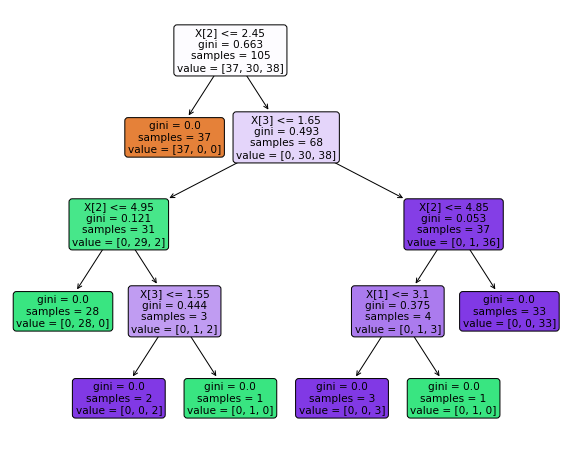

In [14]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

## Step 7 - Prediction and evaluation

**Use the predict method to predict values using your Decision Tree model and X_test.**

In [15]:
y_pred = clf.predict(X_test)

## Evaluating the Algorithm

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics.
Take a look at the following script: [help](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

**Create a confusion matrix and classification report.**

In [16]:
from sklearn import metrics

In [17]:
print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



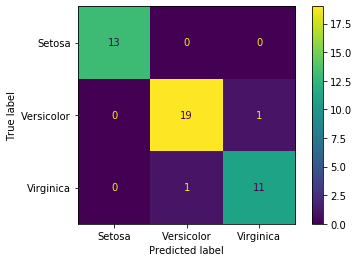

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Setosa', 'Versicolor', 'Virginica'])

cm_display.plot()
plt.show()

# With Entropy

**Create a decision tree model instance

In [19]:
clf = DecisionTreeClassifier(criterion = 'entropy')

**Fit this decision tree model to the training data.** 

you should use the scaled one.

In [20]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
print(clf.get_depth())

4


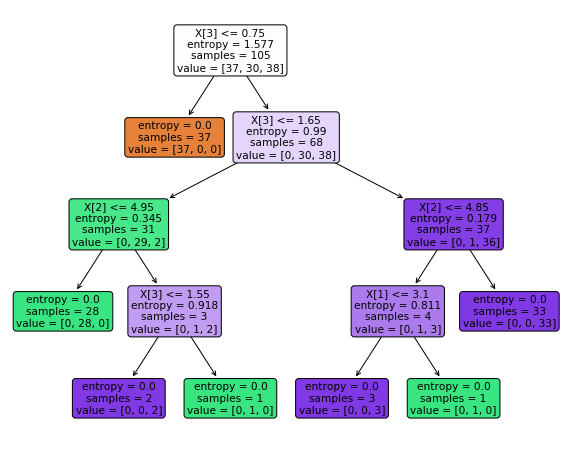

In [22]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

## Prediction and evaluation

**Use the predict method to predict values using your decision tree model and X_test.**

In [23]:
y_pred = clf.predict(X_test)

## Evaluating the Algorithm

For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics.
Take a look at the following script: [help](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

**Create a confusion matrix and classification report.**

In [24]:
print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



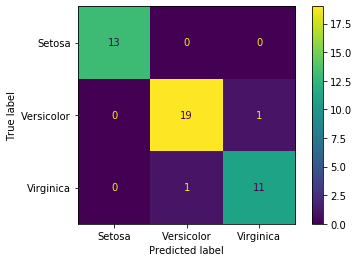

In [25]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Setosa', 'Versicolor', 'Virginica'])

cm_display.plot()
plt.show()

# Pre-pruning

In [26]:
clf=DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV # Used to search for the best parameters

grid_param={"criterion":["gini","entropy"],
             "max_depth":range(1,5,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }

grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,n_jobs=-1) #n_jobs means the number of jobs in parallel (-1 = all processors)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 15),
                         'min_samples_split': range(2, 20)})

In [27]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4}


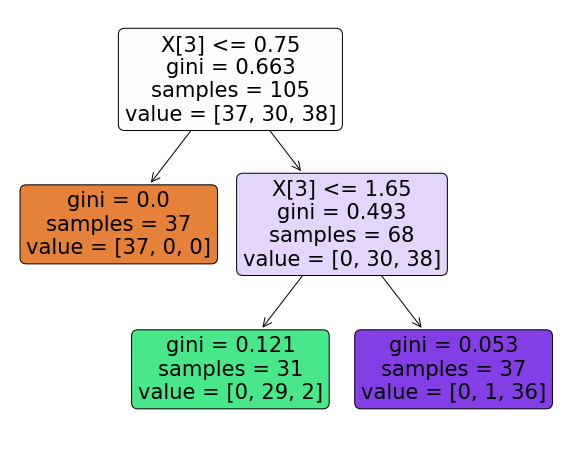

In [28]:
clf=DecisionTreeClassifier(criterion= 'gini',max_depth= 2,min_samples_leaf= 1,min_samples_split= 2)
clf.fit(X_train,y_train)
plt.figure(figsize=(10,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [29]:
y_pred = clf.predict(X_test)

In [30]:
print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.90      0.95      0.93        20
 Iris-virginica       0.91      0.83      0.87        12

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



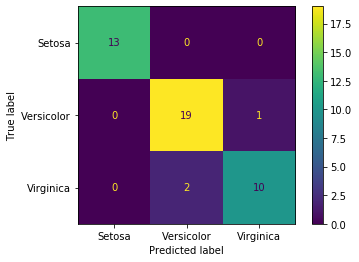

In [31]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Setosa', 'Versicolor', 'Virginica'])

cm_display.plot()
plt.show()

## Second method

In [32]:
from sklearn.metrics import accuracy_score

accuracy = []
for depth in range(1,5):
    clf=DecisionTreeClassifier(criterion= 'gini',max_depth= depth)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

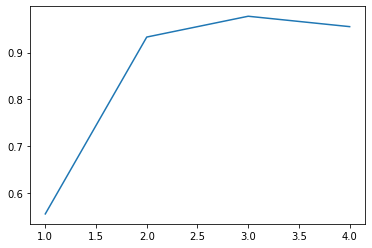

In [34]:
plt.plot(range(1,5),accuracy)

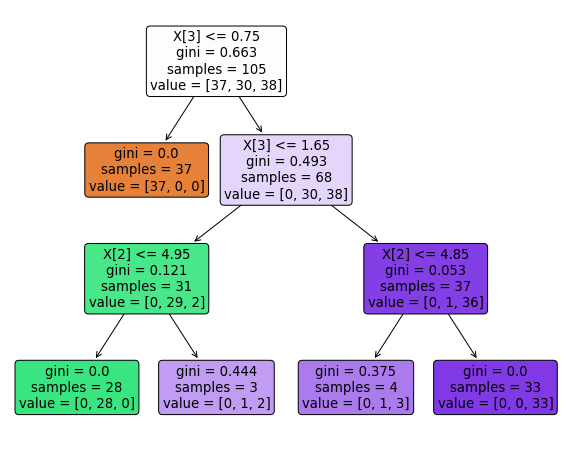

In [35]:
clf=DecisionTreeClassifier(max_depth= 3)
clf.fit(X_train,y_train)
plt.figure(figsize=(10,8))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [36]:
y_pred = clf.predict(X_test)

In [37]:
print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



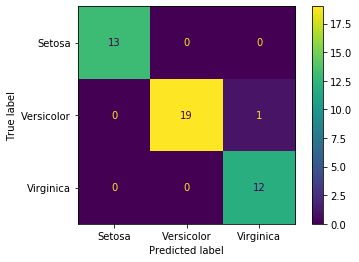

In [38]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Setosa', 'Versicolor', 'Virginica'])

cm_display.plot()
plt.show()

# Post-pruning

In [39]:
clf=DecisionTreeClassifier()

path=clf.cost_complexity_pruning_path(X_train,y_train)

ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha values :",ccp_alphas)
print("Impurities :",impurities)

ccp alpha values : [0.         0.00926641 0.01269841 0.02293907 0.26515743 0.34389222]
Impurities : [0.         0.01853282 0.03123123 0.0541703  0.31932773 0.66321995]


In [40]:
clfs=[]   #will store all the models here
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print(clfs)

[DecisionTreeClassifier(), DecisionTreeClassifier(ccp_alpha=0.009266409266409275), DecisionTreeClassifier(ccp_alpha=0.012698412698412698), DecisionTreeClassifier(ccp_alpha=0.022939068100358413), DecisionTreeClassifier(ccp_alpha=0.26515743176084733), DecisionTreeClassifier(ccp_alpha=0.343892223556089)]


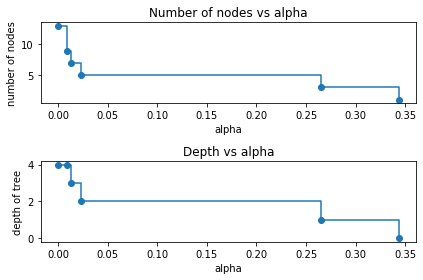

In [41]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

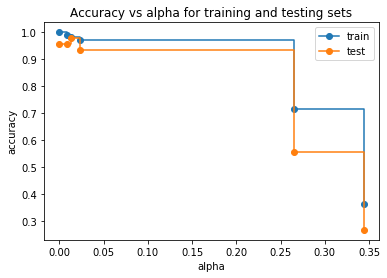

In [42]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

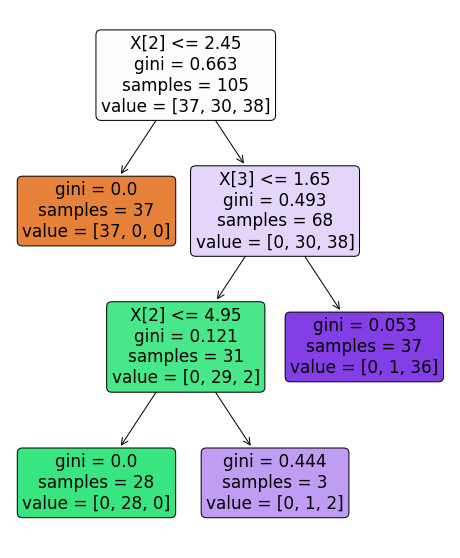

In [43]:
clf=DecisionTreeClassifier(ccp_alpha=0.013)
clf.fit(X_train,y_train)
plt.figure(figsize=(8,10))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [44]:
y_pred = clf.predict(X_test)

In [45]:
print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



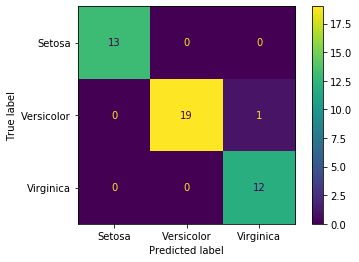

In [46]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Setosa', 'Versicolor', 'Virginica'])

cm_display.plot()
plt.show()